# ESSAIS DE NAPPE - ETUDE DE LA FONCTION DE THEIS

# Solutions applicables en nappe captive d'extension infinie

## Equation de diffusivité

$$\frac{\partial^2 h}{\partial r^2} + \frac{1}{r}\frac{\partial h}{\partial r} = \frac{S}{Kb} \times \frac{\partial h}{\partial t}$$

## Solution de Theis 

### Hypothèses:
- Aquifère reposant sur un couche imperméable
- Formations géologiques homogènes, isotropes, horizontales et d'extension horizontale infinie
- Surface piézométrique initialement horizontale
- Loi de Darcy valide
- Puits parfait et de diamètre négligeable
- Eau provient uniquement de la décompression de l'aquifère

### Equation de Theis 
En réalisation le changement de variable suivant:
$$
	u = \frac{r^2S}{4Kbt}
$$

La résolution de l'équation de diffusivité pour les hypothèses (conditions limites) précédentes amène la solution de Theis

$$
    s = \frac{Q}{4 \pi T} \int_{u}^{\infty} {\frac{e^{-y}}{y}} \mathrm{d}y
$$

### Fonction de Theis
Cette résolution introduit la fonction de Theis  $W(u)$ définie par analogie à l'équation précédente:

$$
	W(u) = \int_{u}^{\infty} {\frac{e^{-y}}{y}} \mathrm{d}y
$$

Cette fonction peut être rapprochée de la fonction Exponentielle Intégrale $E_i$ connue en mathématiques:

$$
	E_i = \int_{-\infty}^{u} {\frac{e^{y}}{y}} \mathrm{d}y
$$
Une fonction alternative $E_1$ peut être définie, de la même famille que la fonction exponentielle intégrale $E_i$ telle que:

$$
    E_1(x) = -E_i(-x) = \int_{x}^{\infty} {\frac{e^{-y}}{y}} \mathrm{d}y = W(u)
$$


### Calcul de W(u) à partir des fonctionnalités de Python

La fonction exponetielle intégrale est implémentée dans la bibliothèque "Scipy.Special" sous la forme "exp1".
On peut directement calculer la valeur $W(u$) telle que:
$$
    W(u) = \int_{u}^{\infty} {\frac{e^{-y}}{y}} \mathrm{d}y = exp1(u)
$$  

In [2]:
#chargement des packages necessaires
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt


u = 0.08  # choisir une valeur de u
print('exp1(u)    =', sp.exp1(u),', module scipy.special')

exp1(u)    = 2.0269410025857417 , module scipy.special


### Calcul de W(u) à partir d'une intégration numérique

Comme toute fonction mathématique continue et dérivable, la fonction de Theis peut faire l'objet d'une intégration numérique afin d'estimer la valeur de $W(u)$ pour toute valeur de borne particulière $u$.

Afin de réaliser cette intégration, il est nécessaire de réécrire la forme continue de la fonction de Theis à l'aide d'une formulation discontinue:
$$
    W(u) = \intop_u^{-\infty} \frac {e^{-y}} y dy \approx \sum_0^N \frac {e^{-y_i}} {y_i} \Delta y_i
$$

où $y_0 = u_0$ et $N$ est un entier suffisamment grand.

Le package numpy permet de réaliser simplement une intégration numérique, en définissant préalablement la fonction à intégrer comme une fonction Python.

In [4]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt


def Wint(u):
    '''Renvoie la valeur de la fonction de Theis obtenue par intégration numérique'''
    LOG10INF = 2 # sufficient as exp(-100) is in the order of 1e-50
    y = np.logspace(np.log10(u), LOG10INF, num=1000)
    arg = np.exp(-y) / y
    dy = np.diff(y)
    w = np.sum(0.5 * (arg[:-1] + arg[1:]) * dy)
    return w

u = 0.08  # choisir une valeur de u
print('Wint(u)    =', Wint(u),', obtenu par intégration numérique')

Wint(u)    = 2.0269702874381887 , obtenu par intégration numérique


### Représentation graphique et courbe de Theis

La courbe de Theis correspond à une abaque exprimant $W(u)$ pour différentes valeurs de $u$. Cette courbe permet d'éviter à avoir à calculer la fonction intégrale. Cette courbe était très utilisée en hydrogéologie lorsque les outils de calculs étaient moins accessibles qu'aujourd'hui.

On utilise deux modes de représentation: $W(u) = f(u)$ et $W(u) = f(1/u)$

La représentation $W(u) = f(1/u)$ est souvent préférée car elle permet une comparaison directe avec les mesures réalisées sur le terrain lors des essais de nappe.

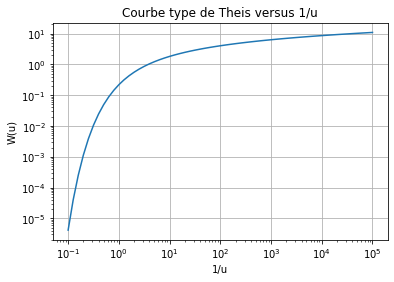

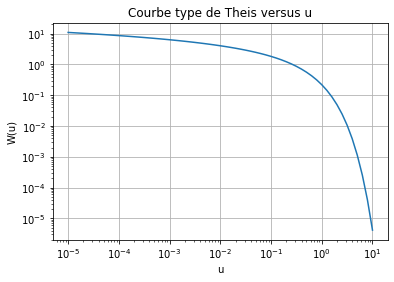

In [11]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

# calcul de u avec echantillonnage log10
u = np.logspace(-5, 1, 61)

# paramétrage de la figure W(u) = f(1/u)
plt.title('Courbe type de Theis versus 1/u')
plt.xlabel('1/u')
plt.ylabel('W(u)')
plt.xscale('log')
plt.yscale('log')
plt.grid()

plt.plot(1/u, sp.exp1(u)) # plot fonction de Theis versus 1/u
plt.show()

# paramétrage de la figure W(u) = f(u)
plt.title('Courbe type de Theis versus u')
plt.xlabel('u')
plt.ylabel('W(u)')
plt.xscale('log')
plt.yscale('log')
plt.grid()

plt.plot(u, sp.exp1(u)) # plot fonction de Theis versus u
plt.show()

### Expression de la fonction de Theis à partir d'un développement en série de Taylor

La fonction de Theis peut également être exprimée selon un développement en série de Taylor. On obtient une formulation en série infinie de puissance:

$$
    W(u) = -\gamma - ln(u) - \sum_{n=1}^{\infty} {\frac{(-1)^n u^n}{n(n)!}}
$$

soit sous la forme développée

$$
    W(u) = -\gamma - ln(u) + u -\frac{u^2}{2.2!} + \frac{u^3}{3.3!} - \frac{u^4}{4.4!} + - \frac{u^5}{5.5!} - \cdots
$$

avec $\gamma = 0.5773$ (nombre d'Euler).

Cette expression corresponds à une série infinie convergente. $W(u)$ peut être approché en tronquant la série infinie après un nombre de terme suffisant

Par exemple, en tronquant la série au 4ème terme:
$$
    W(u) = -\gamma - ln(u) + u -\frac{u^2}{2.2!} + \frac{u^3}{3.3!} - \frac{u^4}{4.4!}
$$


In [9]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

U = 4.0 * 10** -np.arange(11.)   # generates values 4, 4e-1, 4e-2 .. 4e-10
print("{:>10s} {:>10s} {:>10s}".format('u  / ', 'W(u) série tronquée  /', 'W(u) Theis'))
for u in U:
    W = sp.exp1(u)
    w = -0.5772 -np.log(u) + u - ((u)**2)/(2*sp.factorial(2)) + ((u)**3)/(3*sp.factorial(3))- ((u)**4)/(4*sp.factorial(4))
    print("{:.3e} {:.3e} {:.3e}".format(u, w, W))

     u  /  W(u) série tronquée  / W(u) Theis
4.000e+00 -1.075e+00 3.779e-03
4.000e-01 7.024e-01 7.024e-01
4.000e-02 2.681e+00 2.681e+00
4.000e-03 4.948e+00 4.948e+00
4.000e-04 7.247e+00 7.247e+00
4.000e-05 9.549e+00 9.549e+00
4.000e-06 1.185e+01 1.185e+01
4.000e-07 1.415e+01 1.415e+01
4.000e-08 1.646e+01 1.646e+01
4.000e-09 1.876e+01 1.876e+01
4.000e-10 2.106e+01 2.106e+01


#### Sensibilité de la troncature du développement en série de Taylor
Lors de l'approximation de la solution de Theis, l'exactitude du résultat va être fonction de l'ordre retenu pour la troncature du développement de la série de Taylor.

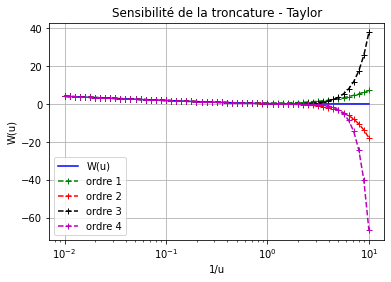

In [13]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

u = np.logspace(-2, 1, 61)
W = sp.exp1(u)
w4 = -0.5772 -np.log(u) + u - ((u)**2)/(2*sp.factorial(2)) + ((u)**3)/(3*sp.factorial(3))- ((u)**4)/(4*sp.factorial(4))
w3 = -0.5772 -np.log(u) + u - ((u)**2)/(2*sp.factorial(2)) + ((u)**3)/(3*sp.factorial(3))
w2 = -0.5772 -np.log(u) + u - ((u)**2)/(2*sp.factorial(2))
w1 = -0.5772 -np.log(u) + u

import matplotlib.pylab as plt

fig1= plt.figure()
ax1 = fig1.add_subplot(111)
ax1.set(xlabel='1/u', ylabel='W(u)', title='Sensibilité de la troncature - Taylor', xscale='log')
ax1.grid(True)
ax1.plot(u, W, 'b', label='W(u)')
#ax1.plot(u, W1(u), 'rx', label='integal') # works only for scalars
ax1.plot(u, w1, 'g+--', label='ordre 1')
ax1.plot(u, w2, 'r+--', label='ordre 2')
ax1.plot(u, w3, 'k+--', label='ordre 3')
ax1.plot(u, w4, 'm+--', label='ordre 4')
ax1.legend(loc='best')

plt.show()

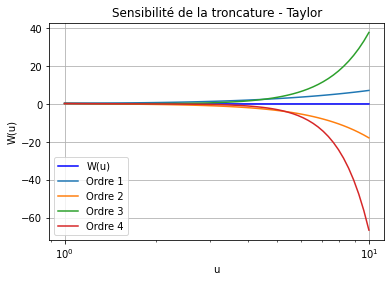

In [14]:
#programmation alternative (et plus intelligente !) faisant appel à des fonctionnalités de boucle pour optimiser la création d'un graphique avec plusieurs séries
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

u = np.logspace(0, 1, 61)
W = sp.exp1(u)
w4 = -0.5772 -np.log(u) + u - ((u)**2)/(2*sp.factorial(2)) + ((u)**3)/(3*sp.factorial(3))- ((u)**4)/(4*sp.factorial(4))
w3 = -0.5772 -np.log(u) + u - ((u)**2)/(2*sp.factorial(2)) + ((u)**3)/(3*sp.factorial(3))
w2 = -0.5772 -np.log(u) + u - ((u)**2)/(2*sp.factorial(2))
w1 = -0.5772 -np.log(u) + u

taylor = (W,w1,w2,w3,w4)

I=np.arange(1,len(taylor))

fig1= plt.figure()
ax1 = fig1.add_subplot(111)
ax1.set(xlabel= 'u', ylabel='W(u)', title='Sensibilité de la troncature - Taylor', xscale='log')
ax1.grid(True)
ax1.plot(u, taylor[0], 'b', label='W(u)')
for i in I:
    ax1.plot(u, taylor[i], label='Ordre %s' % i)
ax1.legend(loc='best')

plt.show()

La précision de l'approximation de la fonction de Theis par le développement en série de Taylor est donc liée à l'ordre de la troncature. On peut illustrer cette observation en introduisant le calcul d'un écart normalisé entre la fonction de Theis et la troncature de Taylor:

$$
\Delta = 1 - \frac{W_{taylor}}{W(u)}
$$

In [15]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

U = np.logspace(-2, 0, 21)
W = lambda u : sp.exp1(u)
w4 = lambda u : -0.5772 -np.log(u) + u - ((u)**2)/(2*sp.factorial(2)) + ((u)**3)/(3*sp.factorial(3))- ((u)**4)/(4*sp.factorial(4))
w1 = lambda u : -0.5772 -np.log(u) + u

print("{:>12s}  {:>12s}   {:>12s}   {:>12s}   {:>12s}   {:>12s}".format('u','W(u)','W4(u)','1-W4(u)/W(u)','W1(u)','1-W1(u)/W(u)'))
for u in U:
    print("{:12.3g}  {:12.3g}  {:12.3g}  {:12.1%}  {:12.3g}  {:12.1%}".format(u, W(u), w4(u), 1-w4(u)/W(u), w1(u), 1-w1(u)/W(u)))

           u          W(u)          W4(u)   1-W4(u)/W(u)          W1(u)   1-W1(u)/W(u)
        0.01          4.04          4.04         -0.0%          4.04         -0.0%
      0.0126          3.81          3.81         -0.0%          3.81         -0.0%
      0.0158          3.58          3.58         -0.0%          3.58         -0.0%
        0.02          3.36          3.36         -0.0%          3.36         -0.0%
      0.0251          3.13          3.13         -0.0%          3.13         -0.0%
      0.0316          2.91          2.91         -0.0%          2.91         -0.0%
      0.0398          2.69          2.69         -0.0%          2.69         -0.0%
      0.0501          2.47          2.47         -0.0%          2.47         -0.0%
      0.0631          2.25          2.25         -0.0%          2.25         -0.0%
      0.0794          2.03          2.03         -0.0%          2.04         -0.1%
         0.1          1.82          1.82         -0.0%          1.83         -0.1%
